# Data Analysis of COVID-19 Cases from 2020 - 2021

### What is this project?
This project is simply an analysis of COVID-19 cases from the start to the date 10/25/2021, this project aims to display comparisons visualzations and to communicate my findings in an easy to understand manner.

### Table of contents

### Library Imports

In [15]:
import pandas as pd 
from pandas.tseries.offsets import MonthEnd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

### Reading the data 

Aim here is to import the data and understand it's contents, datatypes and etc.

In [16]:
df = pd.read_csv('owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126241,ZWE,Africa,Zimbabwe,2021-10-21,132540.0,103.0,41.286,4662.0,3.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
126242,ZWE,Africa,Zimbabwe,2021-10-22,132588.0,48.0,43.286,4663.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
126243,ZWE,Africa,Zimbabwe,2021-10-23,132588.0,0.0,36.429,4663.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
126244,ZWE,Africa,Zimbabwe,2021-10-24,132651.0,63.0,40.429,4669.0,6.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


## Comparing cases between continents

### Setting up the data for continent comparison

In [17]:
continents = df['continent'].unique().tolist()
continents.remove(np.nan)
print(continents)

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']


In [18]:
#Storing the current cases in the same order of continents as the continents list 
continent_curr_cases = []
for i in continents:
    temp_list = df[(df['continent']==i)&(df['date']=='2021-10-25')]['total_cases'].tolist()
    #cleaning data from temp_list for any np.nan values 
    temp_list = [x for x in temp_list if np.isnan(x)==False]
    temp_list = sum(temp_list)
    #appending them to 
    continent_curr_cases.append(temp_list) 

continent_curr_cases


[78762714.0, 63579691.0, 8473216.0, 54756977.0, 38252389.0, 247804.0]

<BarContainer object of 6 artists>

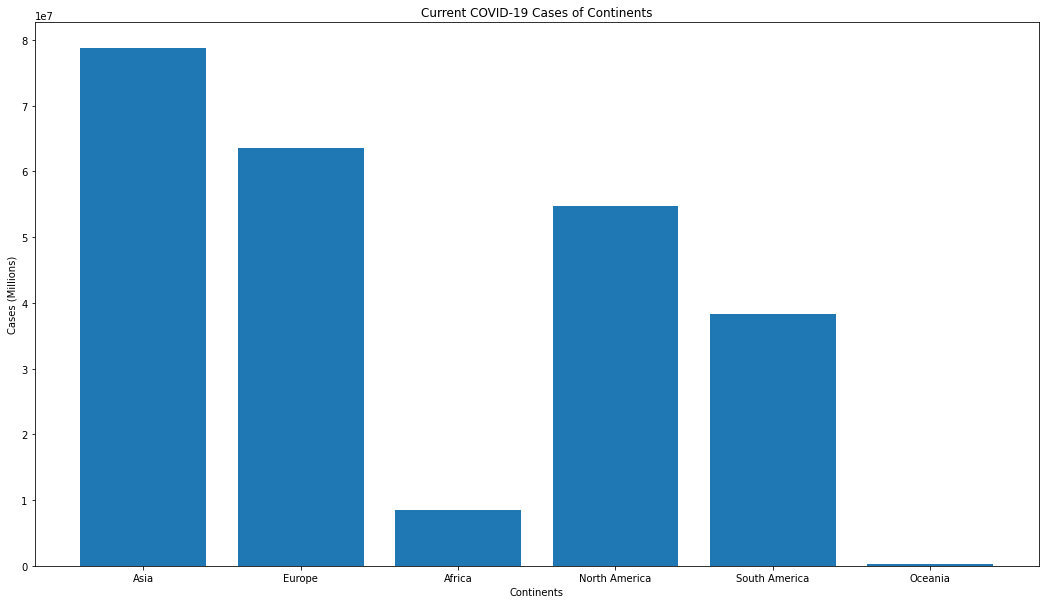

In [19]:
fig, ax = plt.subplots(figsize=(18,10))
plt.title('Current COVID-19 Cases of Continents')
plt.ylabel('Cases (Millions)')
plt.xlabel('Continents')
plt.bar(continents,continent_curr_cases)

## Comparing Cases between the continents from the 31/01/2020 and a month later 28/02/2021

In [20]:
#Storing the current cases in the same order of continents as the continents list 
continent_Jan31_cases = []
for i in continents:
    temp_list = df[(df['continent']==i)&(df['date']=='2020-01-31')]['total_cases'].tolist()
    #cleaning data from temp_list for any np.nan values 
    temp_list = [x for x in temp_list if np.isnan(x)==False]
    temp_list = sum(temp_list)
    #appending them to 
    continent_Jan31_cases.append(temp_list) 

In [21]:
continent_Jan31_cases

[9889.0, 17.0, 0, 12.0, 0, 9.0]

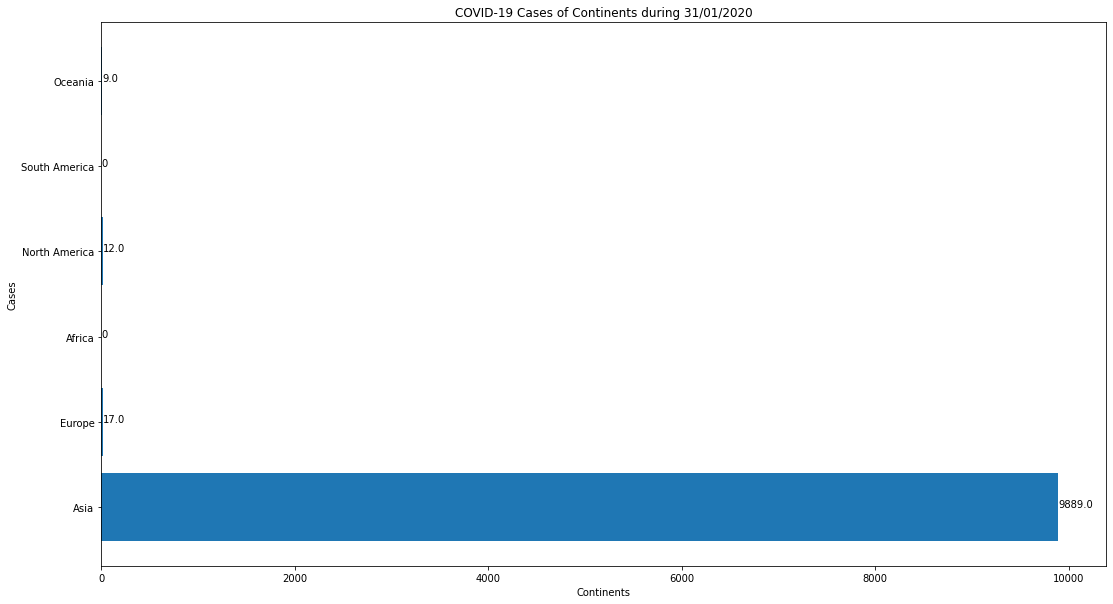

In [22]:
fig, ax = plt.subplots(figsize=(18,10))
plt.title('COVID-19 Cases of Continents during 31/01/2020')
plt.ylabel('Cases')
plt.xlabel('Continents')
plt.barh(continents,continent_Jan31_cases)
for index,value in enumerate(continent_Jan31_cases):
    plt.text(value,index,str(value))

In [23]:
#Storing the current cases in the same order of continents as the continents list 
continent_Feb28_cases = []
for i in continents:
    temp_list = df[(df['continent']==i)&(df['date']=='2020-02-28')]['total_cases'].tolist()
    #cleaning data from temp_list for any np.nan values 
    temp_list = [x for x in temp_list if np.isnan(x)==False]
    temp_list = sum(temp_list)
    #appending them to 
    continent_Feb28_cases.append(temp_list) 

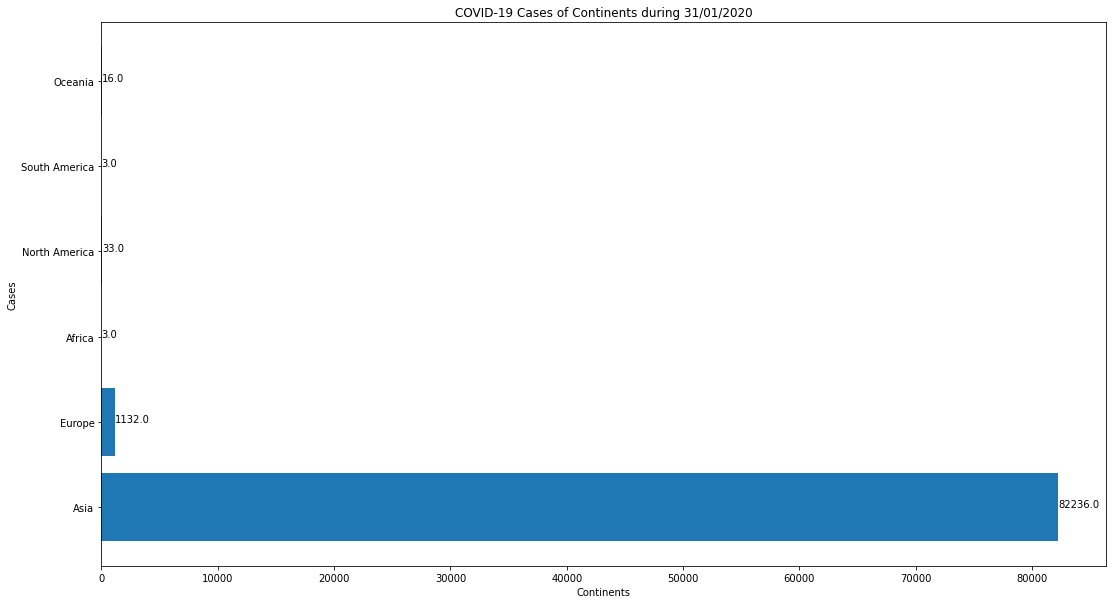

In [24]:
fig, ax = plt.subplots(figsize=(18,10))
plt.title('COVID-19 Cases of Continents during 31/01/2020')
plt.ylabel('Cases')
plt.xlabel('Continents')           
plt.barh(continents,continent_Feb28_cases)
for index,value in enumerate(continent_Feb28_cases):
    plt.text(value,index,str(value))

### Cases throughout the months in 2020

In [27]:
months_end = ['2020-01-31','2020-02-29','2020-03-31','2020-04-30','2020-05-31','2020-06-30','2020-07-31','2020-08-31','2020-09-30','2020-10-31','2020-11-30','2020-12-31']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sums = []
for i in range(len(months_end)):
    temp_list = df[df['date']==months_end[i]]['total_cases'].tolist()
    temp_list = [x for x in temp_list if np.isnan(x)==False]
    temp_list =np.sum(list(map(int,temp_list)))
    sums.append(temp_list)

[29794,
 258766,
 3025106,
 10833837,
 19726832,
 32653438,
 54262971,
 78447888,
 104959469,
 144828081,
 201887525,
 266460515]

Text(0, 0.5, 'Cases (millions)')

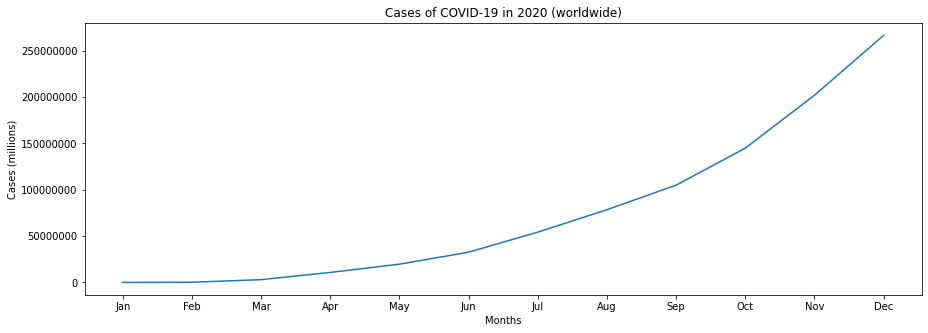

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=months,y=sums).set_title('Cases of COVID-19 in 2020 (worldwide)')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #<- Used to remove scientific notation 
ax.set_xlabel('Months')
ax.set_ylabel('Cases (millions)')

### Comparison of the 5 most urbanised countries vs top 5 least urbanised countries 

1. Need to gain a list of top 10 most urbanised countries
2. Need to gain a list of top 10 least urbanised countries
3. Get their total cases during the date 25/10/2021 
4. Plot them in a bar chart

In [76]:
urbanised = ['Vatican','Nauru','Anguilla','Gibraltar','Monaco']
urbanised_cases = []
#df[(df['location']=='Vatican')&(df['date']=='2021-10-25')]['total_cases']
for i in range(len(urbanised)) :
    case = df[(df['location']==urbanised[i])&(df['date']=='2021-10-25')]['total_cases']
    urbanised_cases.append(int(float(case.to_string(index=False)))) if(case.any()) else urbanised_cases.append(0) 
urbanised_cases

[27, 0, 0, 0, 3394]

<BarContainer object of 5 artists>

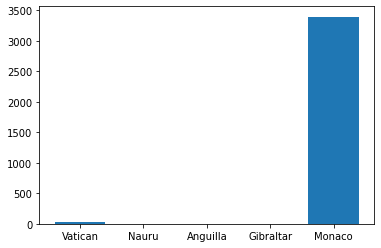

In [77]:
plt.bar(urbanised,urbanised_cases)